# **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from io import StringIO  # Optional: if data is from string, but here assume file
from datetime import datetime

# **load dataset**

In [2]:
df = pd.read_csv('garments_worker_productivity.csv')

# **Initial EDA**
We explore the dataset structure, data types, and basic information to understand the data.

In [3]:
print("First 5 rows:")
print(df.head())

First 5 rows:
       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0         

In [4]:
df.shape

(1197, 15)

The dataset contains 1197 rows and 15 columns.

In [5]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   fl

In [6]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000 

In [7]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [8]:
print(df.duplicated().sum())

0


In [9]:
# Unique values in categorical columns
categorical_cols = ['quarter', 'department', 'day']
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in quarter:
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

Unique values in department:
['sweing' 'finishing ' 'finishing']

Unique values in day:
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


In [10]:
# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


# **Initial Visualization**

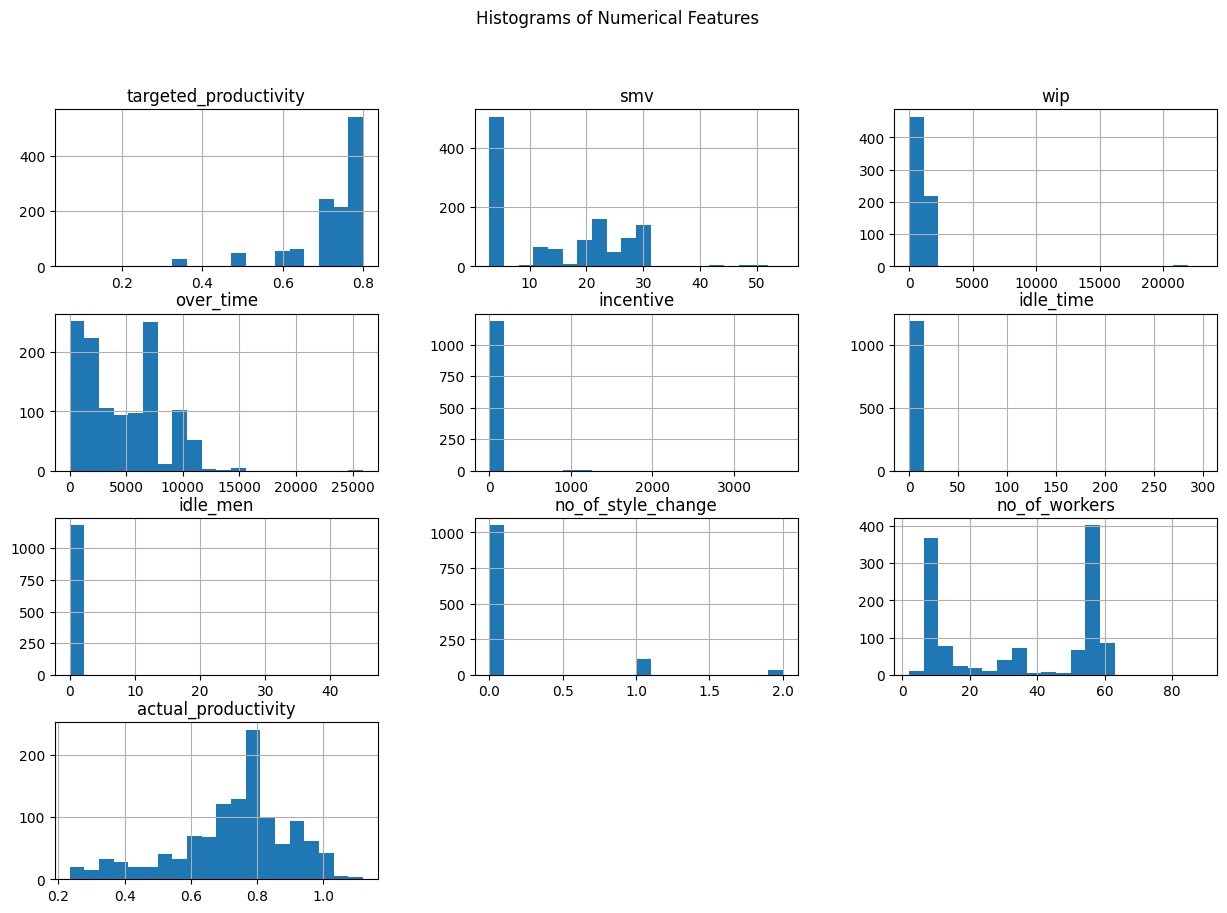

In [11]:
numerical_cols = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
                  'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

Key insight:
- Most productivity values are 0.7–0.9
- over_time & incentive are heavily right-skewed → few workers get high OT/incentives
- Many wip = 0 → no backlog in many cases

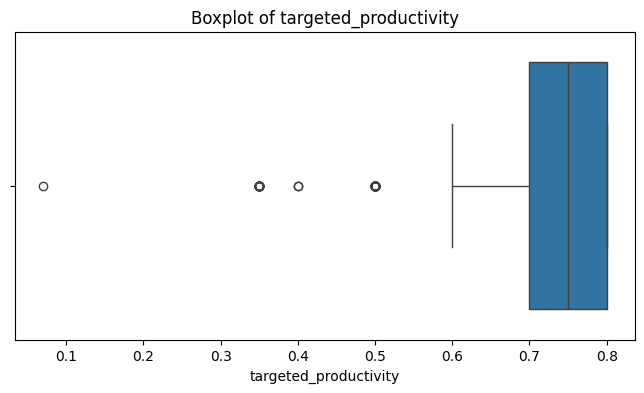

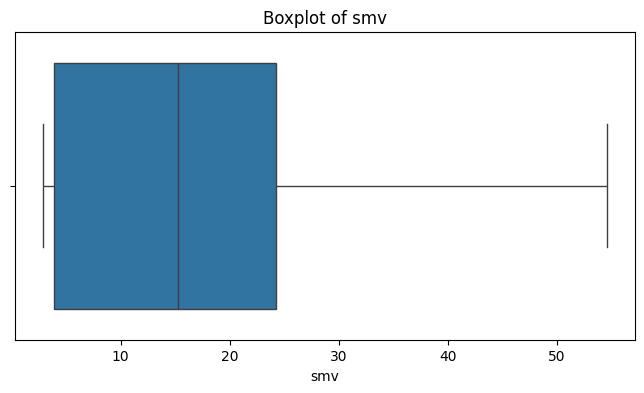

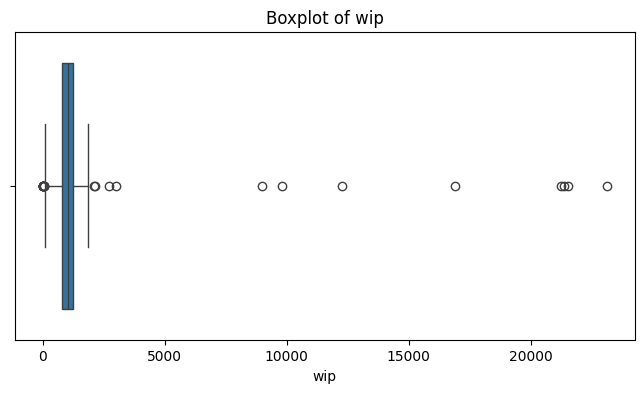

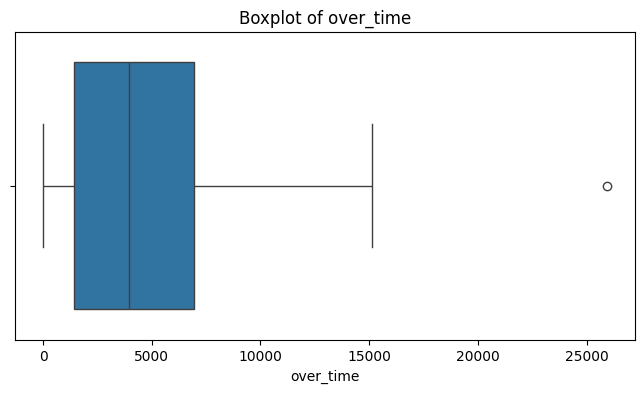

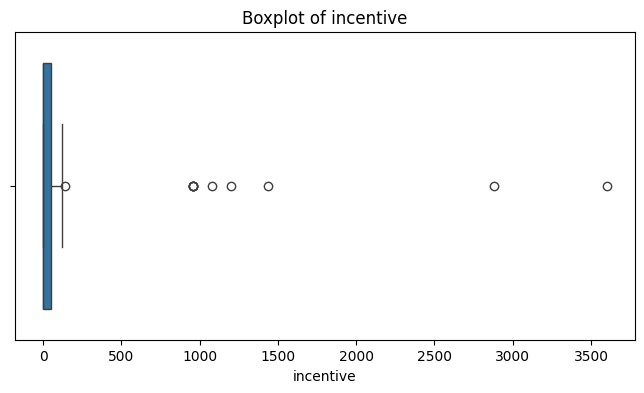

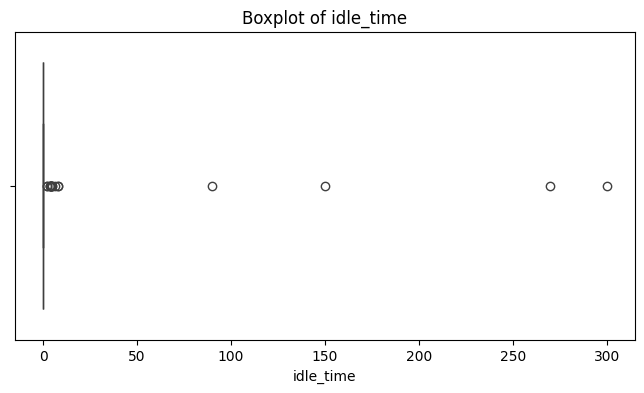

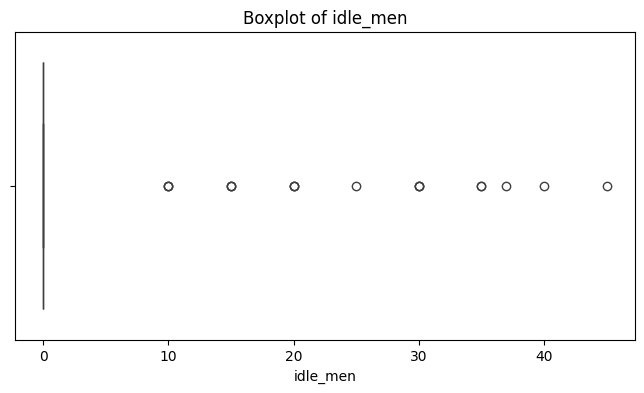

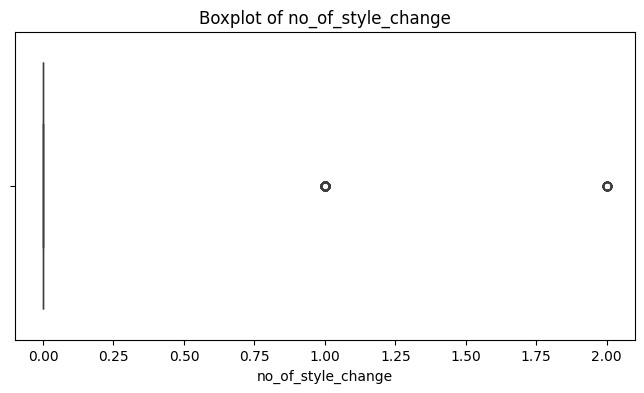

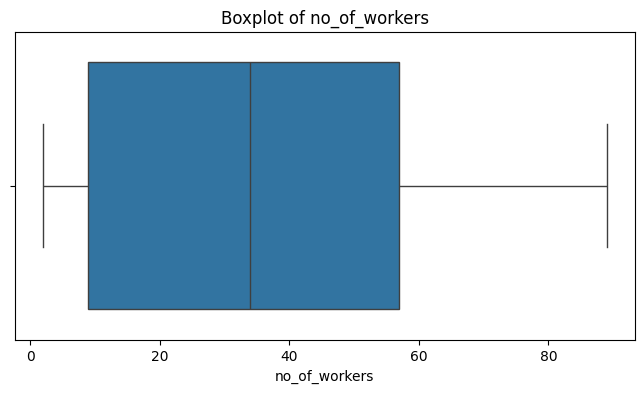

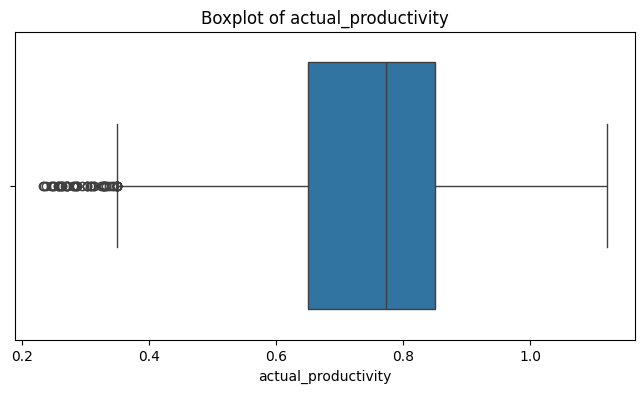

In [12]:
# Boxplots for numerical features to detect outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

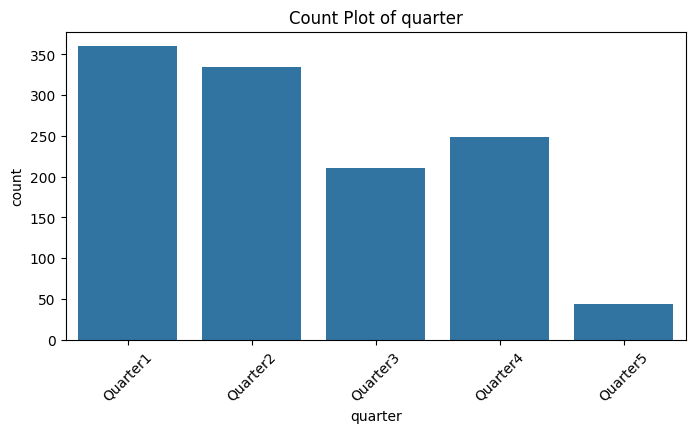

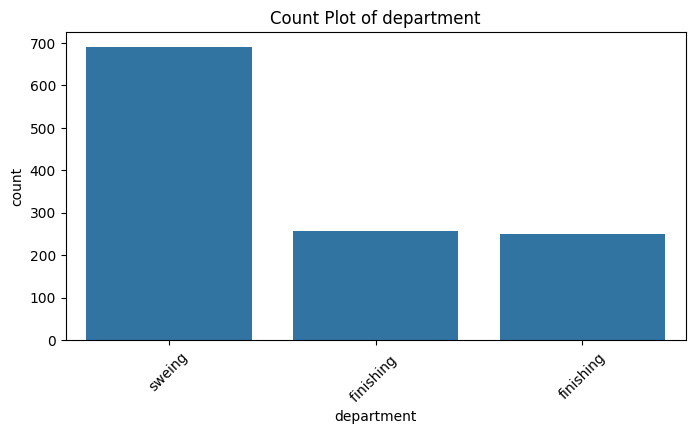

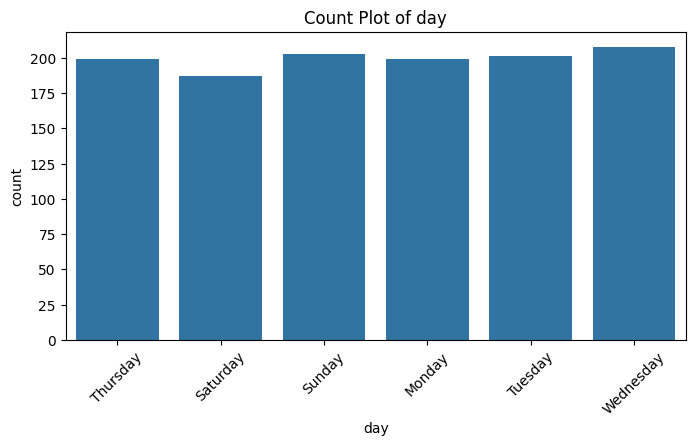

In [13]:
# Count plots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

# **2. Data Cleaning**
This step includes fixing inconsistent categorical values, handling formatting issues, and preparing the data for analysis.

In [14]:
df.drop(columns=['wip'],inplace=True)

The percentage of missing values in `wip` > 40% , so we decide drop it


In [15]:
#The `department` feature contained inconsistent formatting due to trailing spaces and spelling variations ("sweing", "finishing "). These inconsistencies were corrected
if 'department' in df.columns:
    df['department'] = df['department'].str.strip().replace('sweing', 'sewing')

In [16]:
print("Department after cleaning", df['department'].unique())

Department after cleaning ['sewing' 'finishing']


In [17]:
# Convert 'date' to datetime format
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [18]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

In [19]:
# Check missing values after cleaning
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


In [20]:
# Fixing Outliers by using IQR
outlier_cols = ['actual_productivity', 'over_time', 'incentive', 'smv','no_of_workers']

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print(f"Data shape after deleting outliers: {df.shape}")

Data shape after deleting outliers: (1133, 14)


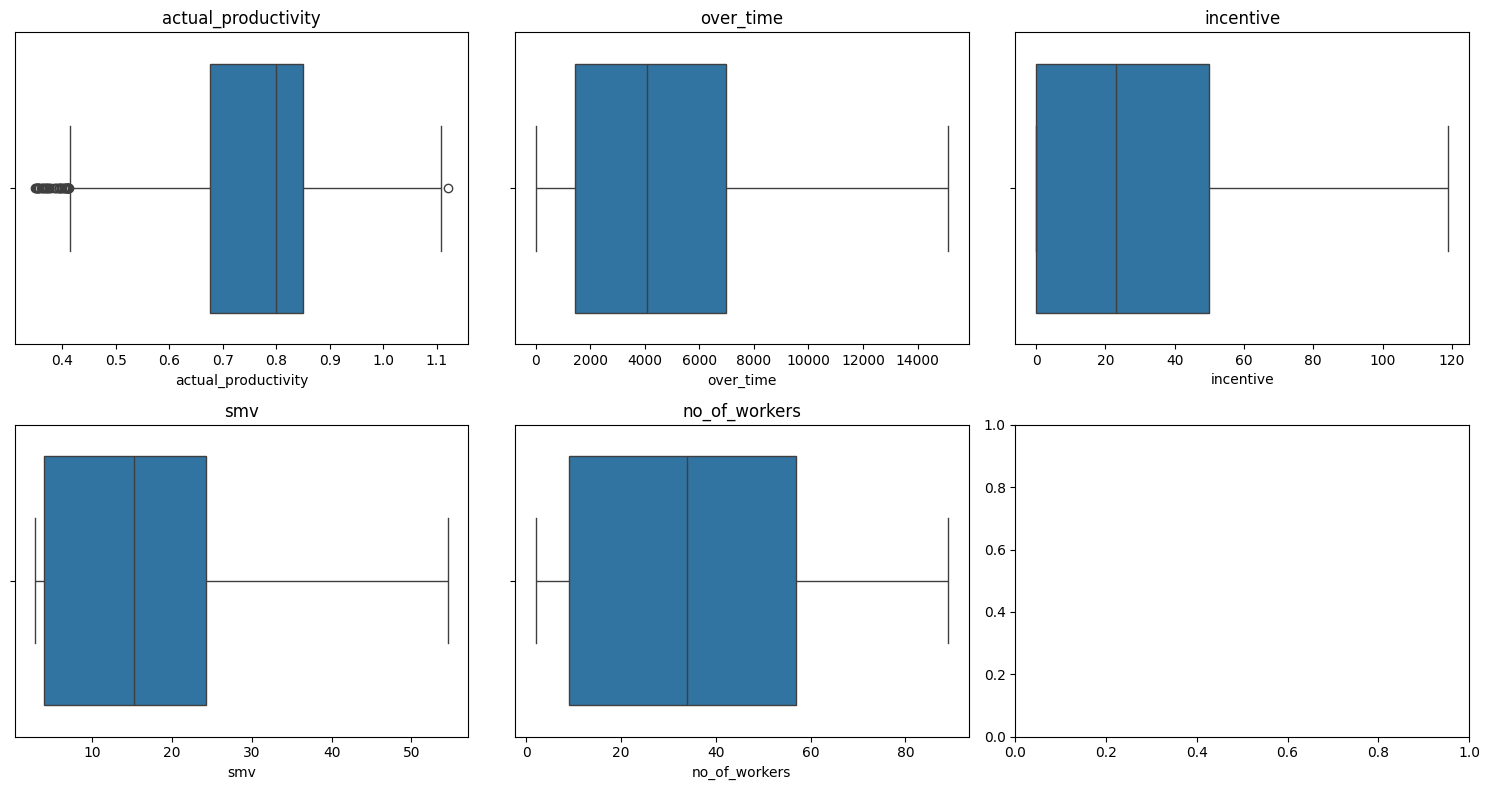

In [21]:
# Boxblot visualization after handling outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()
for i, col in enumerate(outlier_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis (EDA)**
We analyze distributions, relationships, and patterns in the dataset to gain insights and detect potential issues.

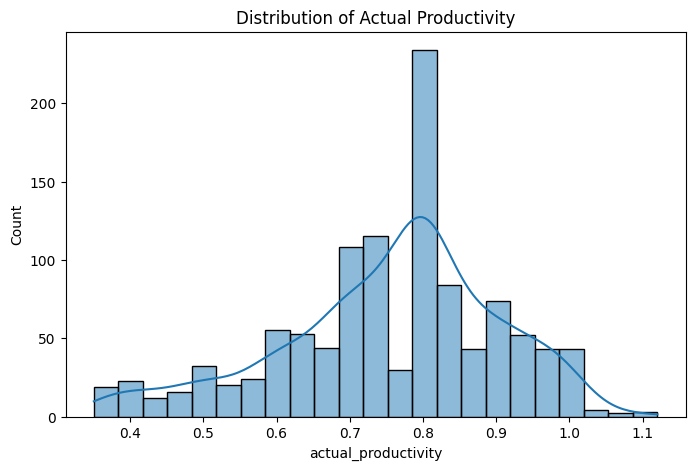

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['actual_productivity'],kde=True)
plt.title("Distribution of Actual Productivity")
plt.show()

The target variable appears to be left-skewed.


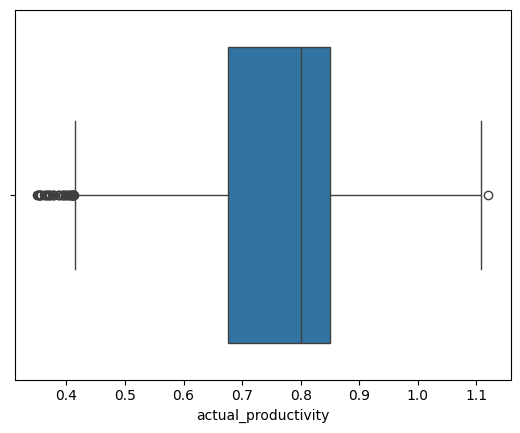

In [23]:
sns.boxplot(x=df['actual_productivity'])
plt.show()

The boxplot indicates the presence of a few lower-end outliers in the target variable

In [24]:
df.describe()

,date,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1133,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.00000,1133.000000
mean,2015-02-04 03:14:27.431597568,6.390115,0.734969,15.197979,4620.706090,26.849073,0.743601,0.253310,0.146514,34.98985,0.755101
min,2015-01-01 00:00:00,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.350417
25%,2015-01-17 00:00:00,3.000000,0.700000,3.940000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.675568
50%,2015-02-03 00:00:00,6.000000,0.750000,15.260000,4080.000000,23.000000,0.000000,0.000000,0.000000,34.00000,0.799963
75%,2015-02-23 00:00:00,9.000000,0.800000,24.260000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.00000,0.850446
max,2015-03-11 00:00:00,12.000000,0.800000,54.560000,15120.000000,119.000000,300.000000,45.000000,2.000000,89.00000,1.120437
std,NaN,3.473724,0.090829,10.897078,3294.216179,30.487836,13.057371,2.657794,0.426257,22.14964,0.149520


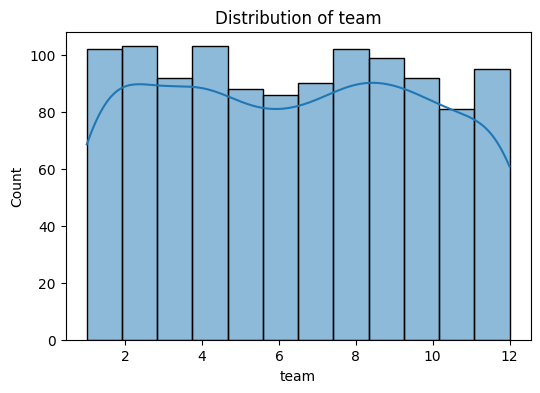

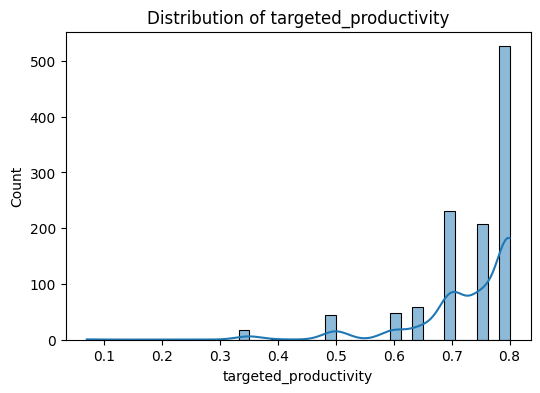

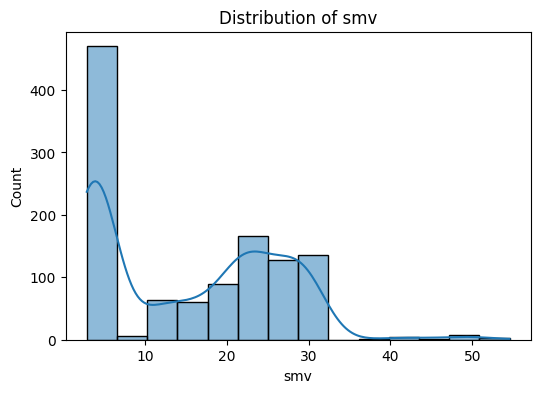

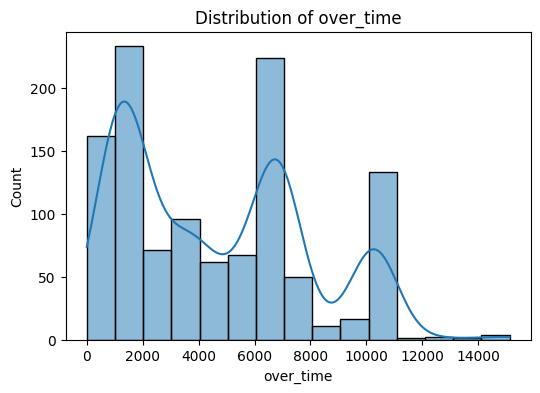

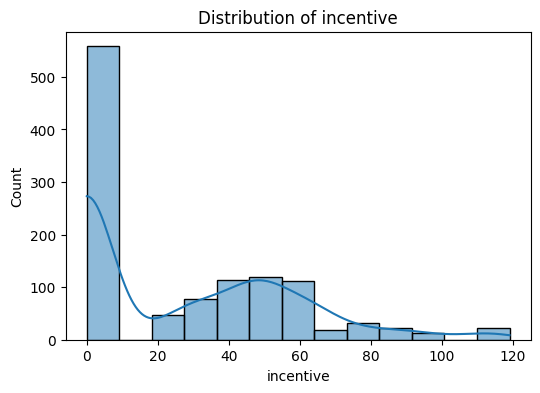

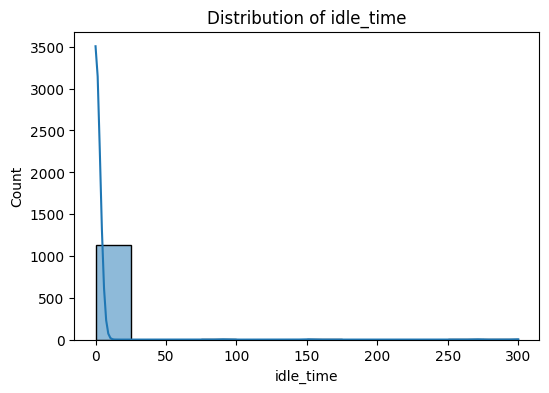

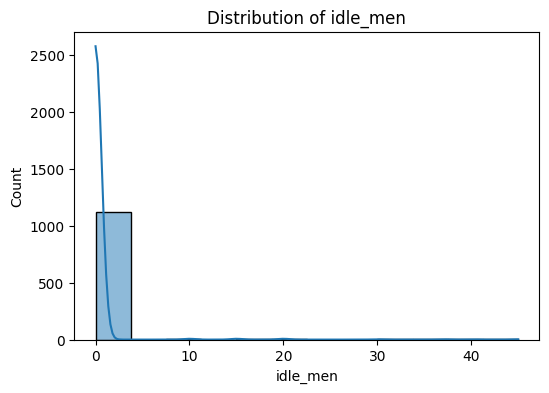

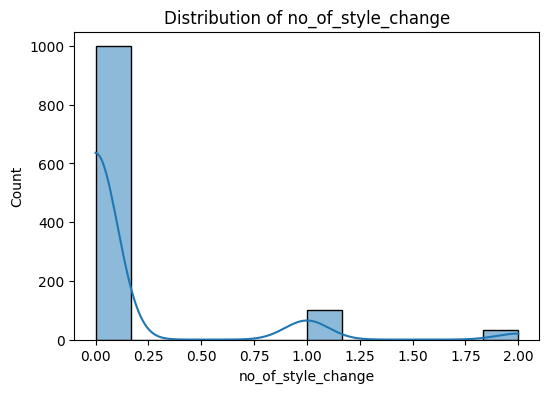

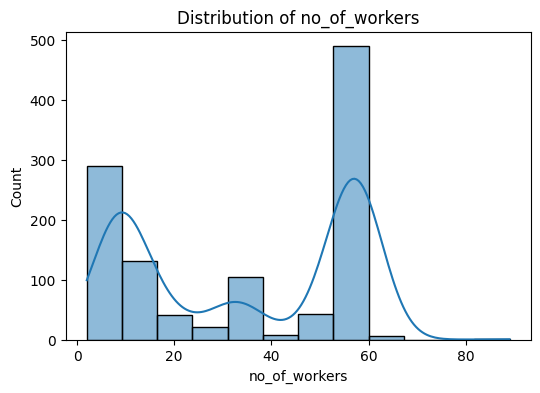

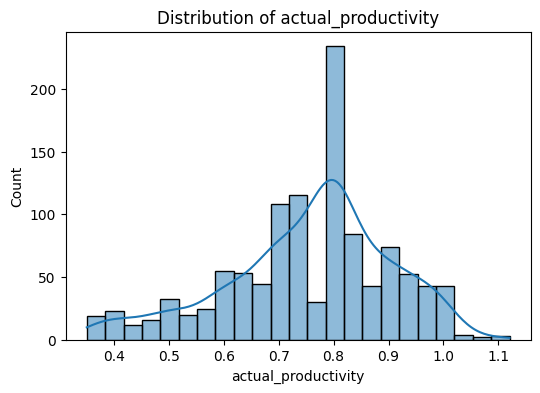

In [25]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

Most of The variables (`idl_men , idle_time , incentive , overtime , smv `) have a left-skwed distribution with highly exttreme .
The `target_productivity` vriable appers to be a right skwed.
The `team` variable appers to be normal distribution .


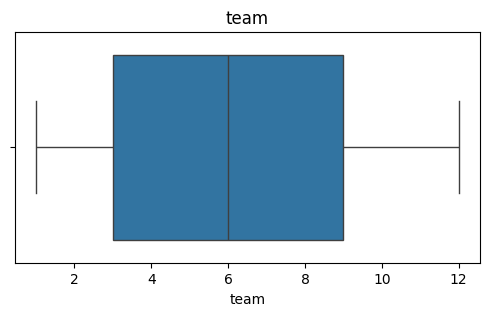

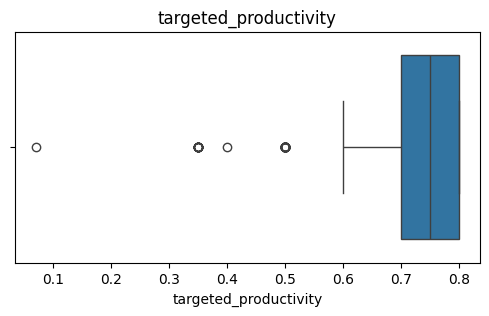

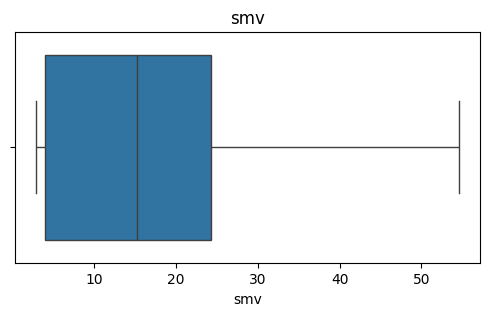

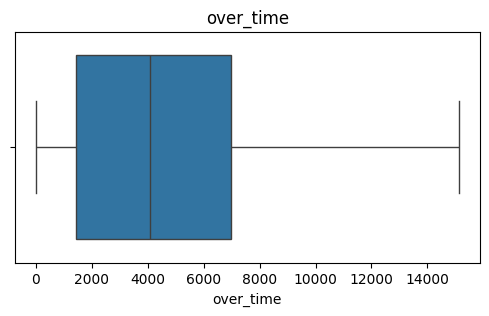

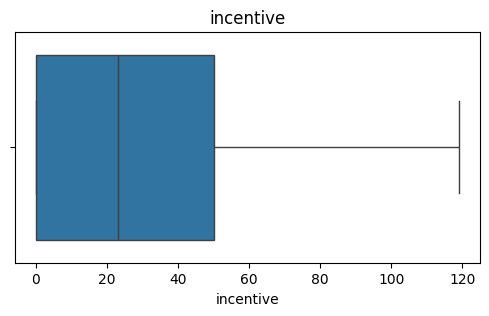

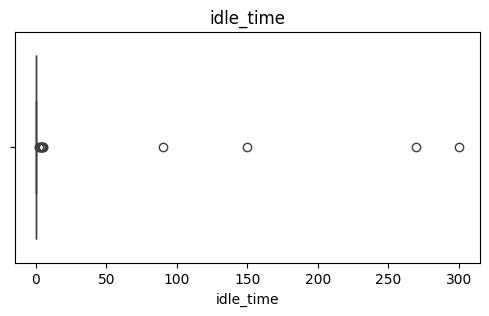

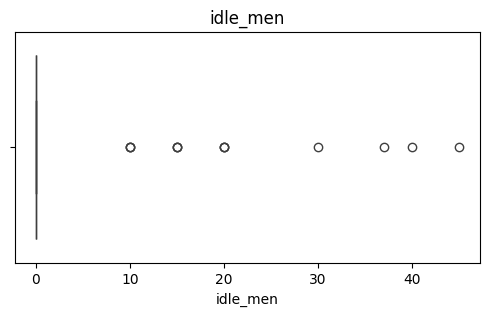

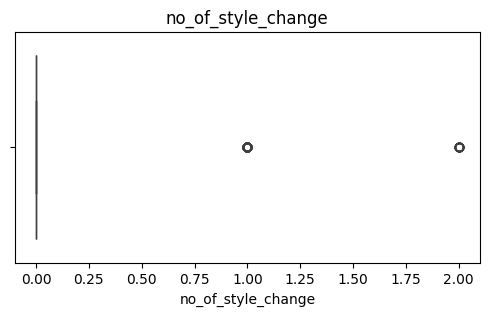

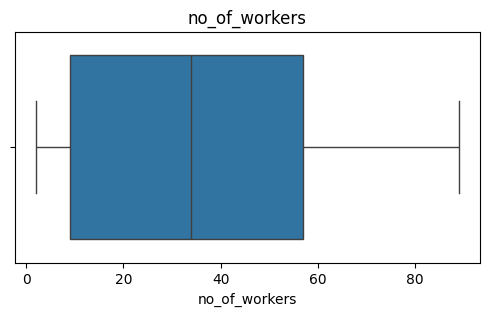

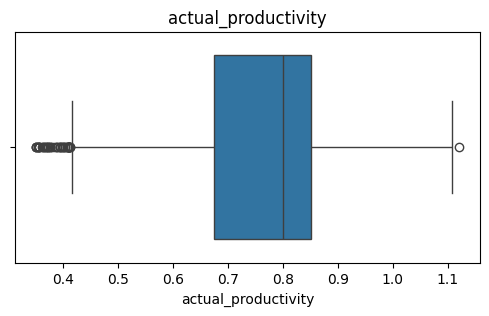

In [26]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

The boxplot indicates the presence of a few longer-end outliers in the `incentive , idle_time , idle_men` variables

# **Categorical Features Analysis**

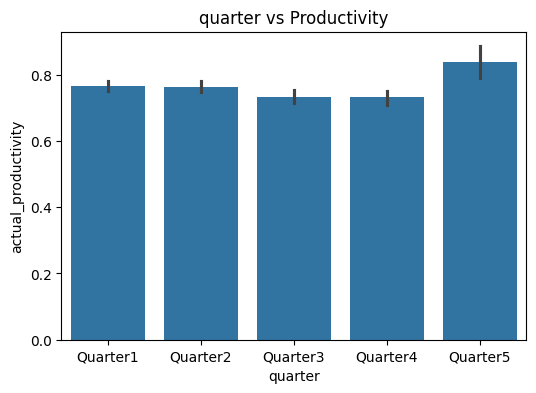

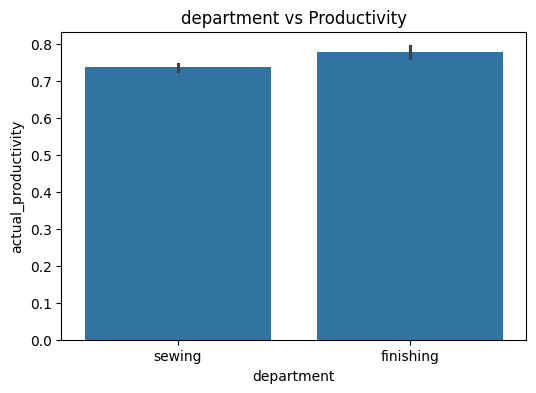

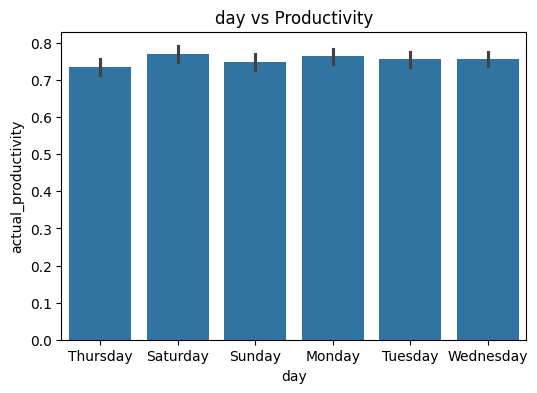

In [27]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=df[col], y=df['actual_productivity'])
    # plt.xticks(rotation=45)
    plt.title(f"{col} vs Productivity")
    plt.show()

- The Sewing department appears to have higher productivity.


# **Correlation Analysis**

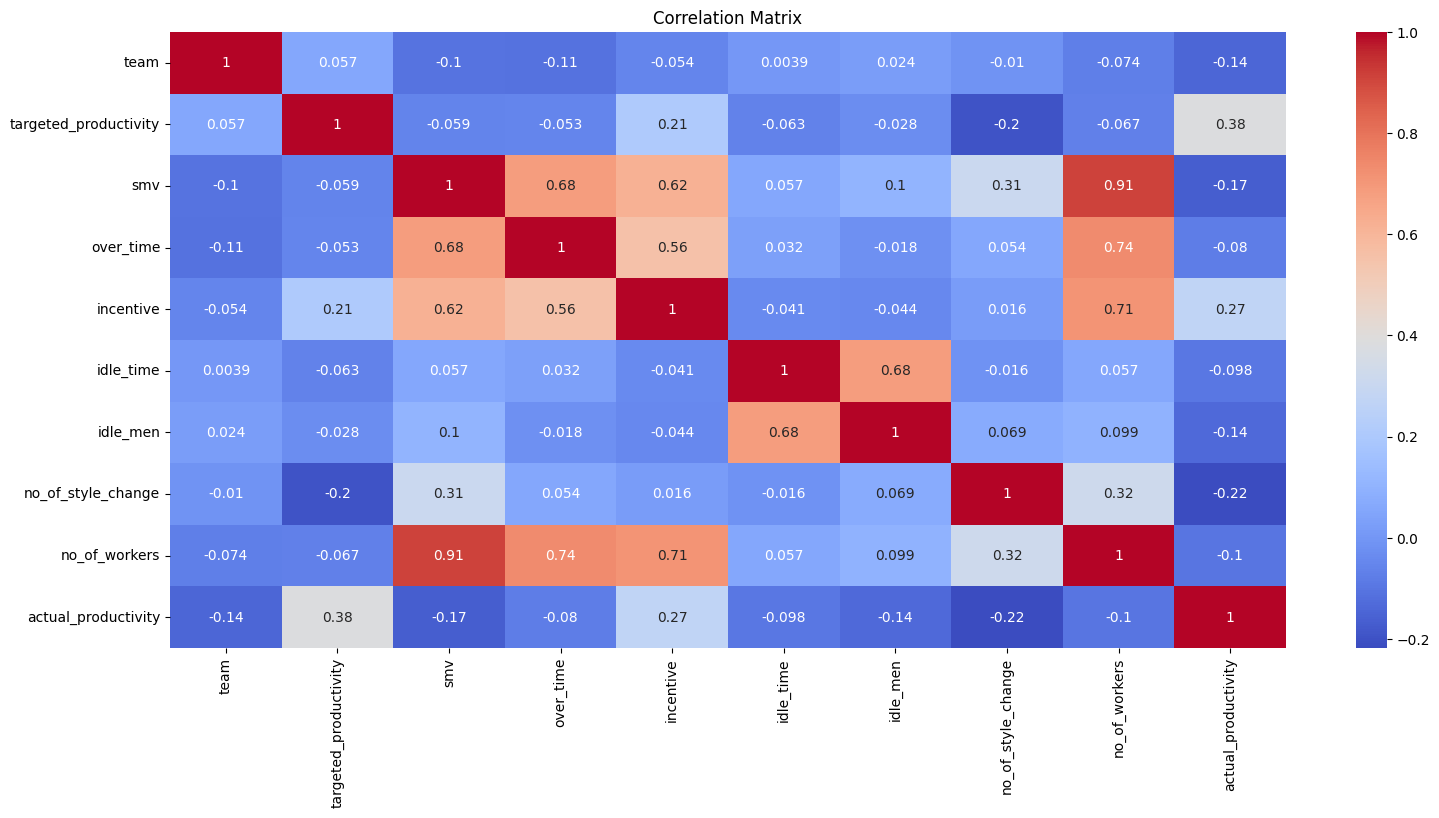

In [28]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The strongest positive correlation between `actual_productivity` and `target_productivity`
The strongest positive correlation between `n_of_workers` and `smv,overtime,no_of_changes`
The strongest positive correlation between `idle_men` and `idle_time`

# **3. Data Preprocessing**
This stage includes encoding categorical variables, handling missing values, and preparing the dataset for modeling.

In [29]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [30]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# If 'department' was corrected, it's now categorical, encode it
# Already included in categorical_cols

# Scale numerical features (using StandardScaler)
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Drop 'date' if not needed, or keep for now (will engineer features later)
# For now, keep it

print("\nDataset After Preprocessing:")
print(df.head())


Dataset After Preprocessing:
        date  quarter  department  day      team  targeted_productivity  \
0 2015-01-01        0           1    3  0.463651               0.716286   
1 2015-01-01        0           0    3 -1.552367               0.165558   
2 2015-01-01        0           1    3  1.327659               0.716286   
3 2015-01-01        0           1    3  1.615662               0.716286   
4 2015-01-01        0           1    3 -0.112354               0.716286   

        smv  over_time  incentive  idle_time  idle_men  no_of_style_change  \
0  1.006404   0.746879   2.334779  -0.056974  -0.09535           -0.343873   
1 -1.033575  -1.111743  -0.881038  -0.056974  -0.09535           -0.343873   
2 -0.347768  -0.291763   0.759685  -0.056974  -0.09535           -0.343873   
3 -0.347768  -0.291763   0.759685  -0.056974  -0.09535           -0.343873   
4  0.982534  -0.820195   0.759685  -0.056974  -0.09535           -0.343873   

   no_of_workers  actual_productivity  
0       1.

# **4. Feature Engineering**
New features are created to capture additional information that may improve model performance.

In [31]:
# Extract features from 'date'
if 'date' in df.columns:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day_of_month'] = df['date'].dt.day
    df['week_of_year'] = df['date'].dt.isocalendar().week
    # 'day' is already there as weekday name, but we encoded it

In [32]:
# Create new features: e.g., productivity difference
df['productivity_diff'] = df['actual_productivity'] - df['targeted_productivity']

In [33]:
# Ratio features: e.g., over_time per worker
df['over_time_per_worker'] = df['over_time'] / (df['no_of_workers'] + 1)  # Avoid division by zero

In [34]:
# Incentive per worker
df['incentive_per_worker'] = df['incentive'] / (df['no_of_workers'] + 1)

In [35]:
# Idle time impact: idle_time * idle_men
df['idle_impact'] = df['idle_time'] * df['idle_men']

In [36]:
df['idle_ratio'] = df['idle_time'] / (df['smv'] + 1)

In [37]:
# Scale new numerical features
new_numerical = ['productivity_diff', 'over_time_per_worker', 'incentive_per_worker', 'idle_impact','idle_ratio']
scaler_new = StandardScaler()
df[new_numerical] = scaler_new.fit_transform(df[new_numerical])

In [38]:
# Drop original 'date' if no longer needed
df.drop('date', axis=1, inplace=True)

In [39]:
print("\nDataset After Feature Engineering:")
print(df.head())


Dataset After Feature Engineering:
   quarter  department  day      team  targeted_productivity       smv  \
0        0           1    3  0.463651               0.716286  1.006404   
1        0           0    3 -1.552367               0.165558 -1.033575   
2        0           1    3  1.327659               0.716286 -0.347768   
3        0           1    3  1.615662               0.716286 -0.347768   
4        0           1    3 -0.112354               0.716286  0.982534   

   over_time  incentive  idle_time  idle_men  ...  actual_productivity  year  \
0   0.746879   2.334779  -0.056974  -0.09535  ...             1.242021  2015   
1  -1.111743  -0.881038  -0.056974  -0.09535  ...             0.879197  2015   
2  -0.291763   0.759685  -0.056974  -0.09535  ...             0.304239  2015   
3  -0.291763   0.759685  -0.056974  -0.09535  ...             0.304239  2015   
4  -0.820195   0.759685  -0.056974  -0.09535  ...             0.302978  2015   

   month  day_of_month  week_of_year  

# **5. Post-Processing EDA & Visualization**

In [40]:
print("\nSummary Statistics After Processing:")
print(df.describe())


Summary Statistics After Processing:
           quarter   department          day          team  \
count  1133.000000  1133.000000  1133.000000  1.133000e+03   
mean      1.394528     0.585172     2.560459  1.395373e-16   
std       1.224256     0.492910     1.698864  1.000442e+00   
min       0.000000     0.000000     0.000000 -1.552367e+00   
25%       0.000000     0.000000     1.000000 -9.763620e-01   
50%       1.000000     1.000000     3.000000 -1.123541e-01   
75%       2.000000     1.000000     4.000000  7.516538e-01   
max       4.000000     1.000000     5.000000  1.615662e+00   

       targeted_productivity           smv     over_time     incentive  \
count           1.133000e+03  1.133000e+03  1.133000e+03  1.133000e+03   
mean            1.442408e-16 -1.128841e-16 -1.003414e-16  5.644205e-17   
std             1.000442e+00  1.000442e+00  1.000442e+00  1.000442e+00   
min            -7.324332e+00 -1.129056e+00 -1.403292e+00 -8.810376e-01   
25%            -3.851688e-01 -1.0

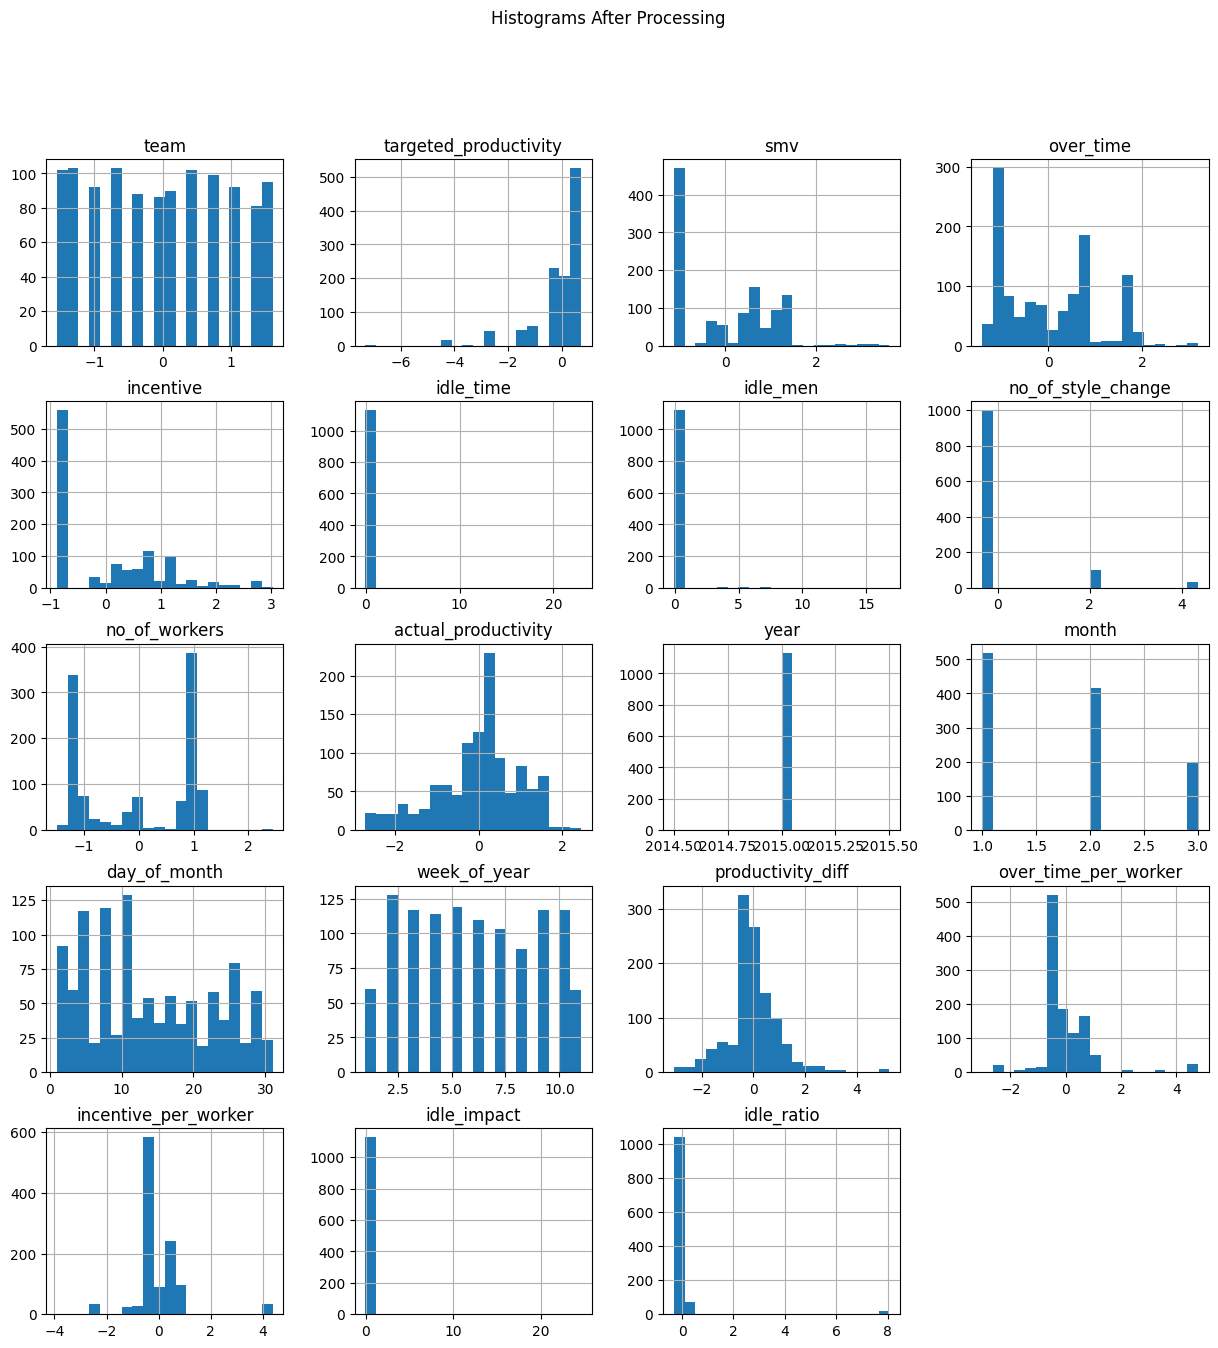

In [42]:
# Histograms after scaling and engineering
all_numerical = list(numerical_cols) + ['year', 'month', 'day_of_month', 'week_of_year'] + list(new_numerical)
all_numerical = [col for col in all_numerical if col in df.columns]

df[all_numerical].hist(bins=20, figsize=(15, 15))
plt.suptitle('Histograms After Processing')
plt.show()

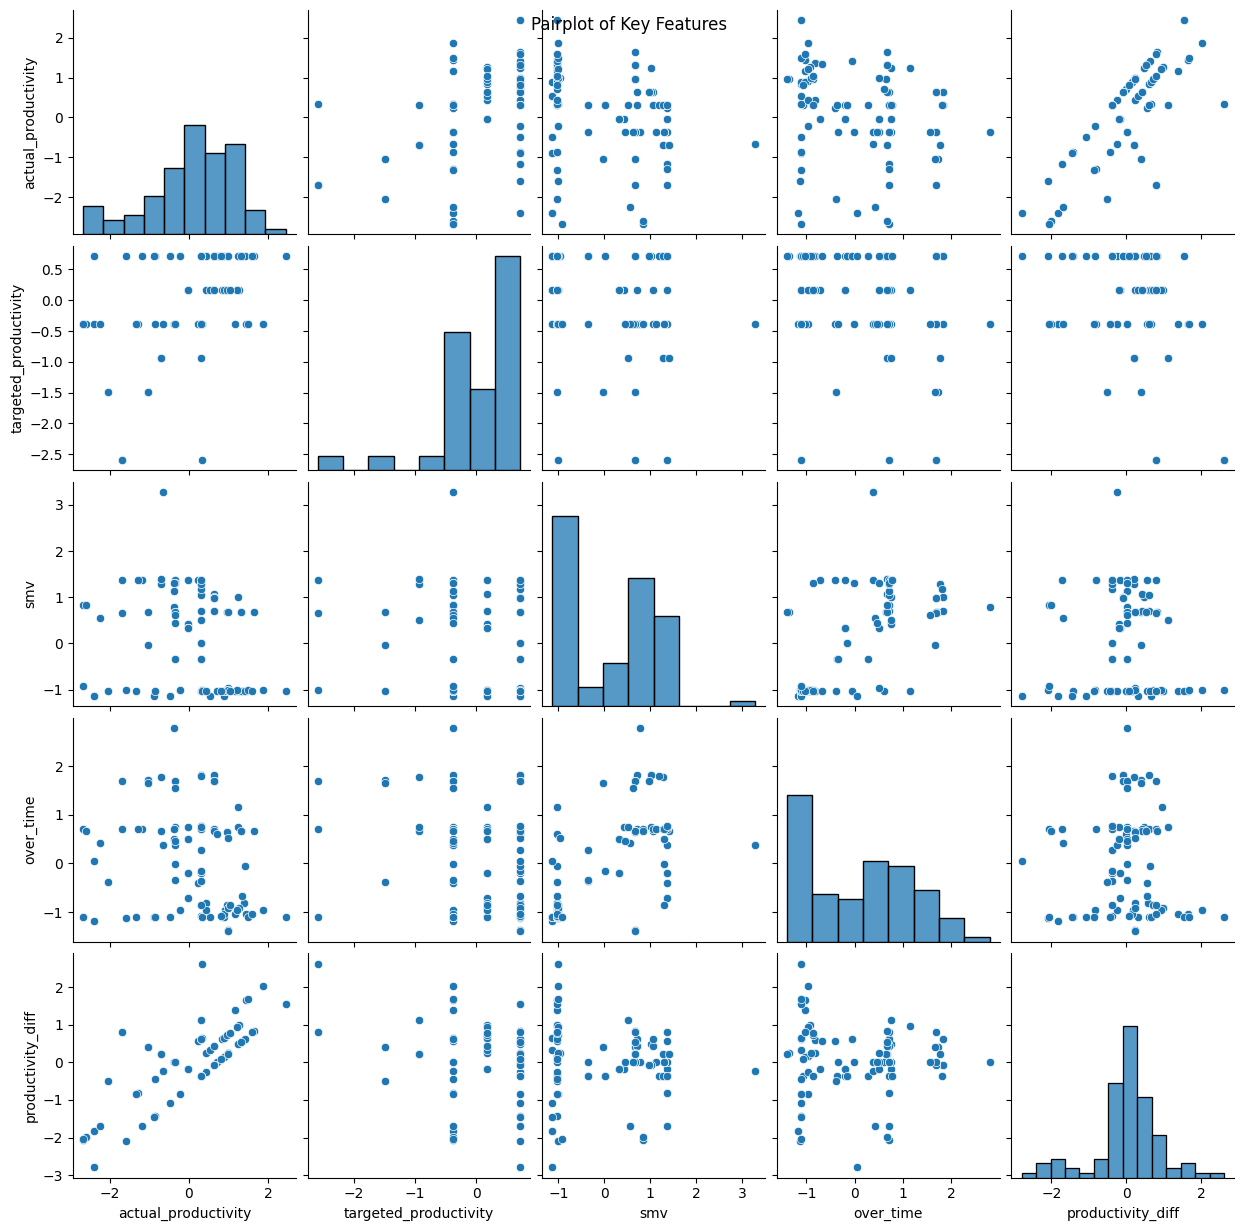

In [44]:
# Pairplot for key features (sample if large)
sns.pairplot(df[['actual_productivity', 'targeted_productivity', 'smv','over_time', 'productivity_diff']].sample(100))
plt.suptitle('Pairplot of Key Features')
plt.show()

Key insight:
- incentive shows positive trend with actual_productivity
- Many teams slightly exceed target (actual > targeted)
- over_time vs productivity relationship flattens at high values

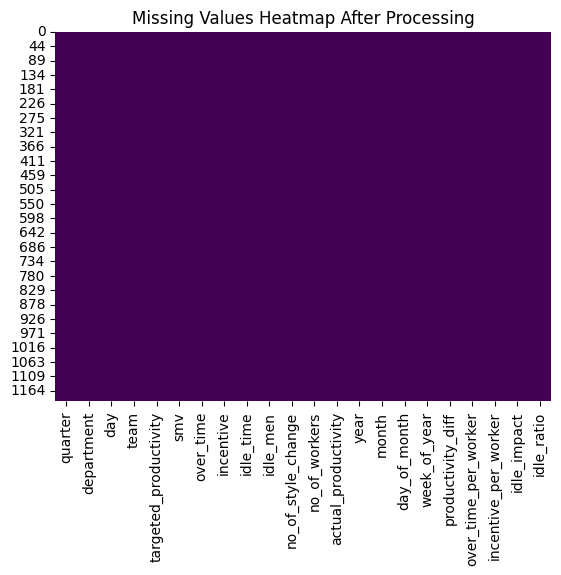

In [45]:
# Heatmap of missing values (should be none)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Processing')
plt.show()

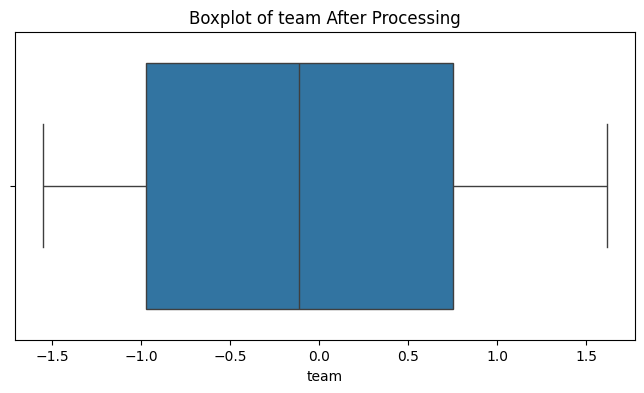

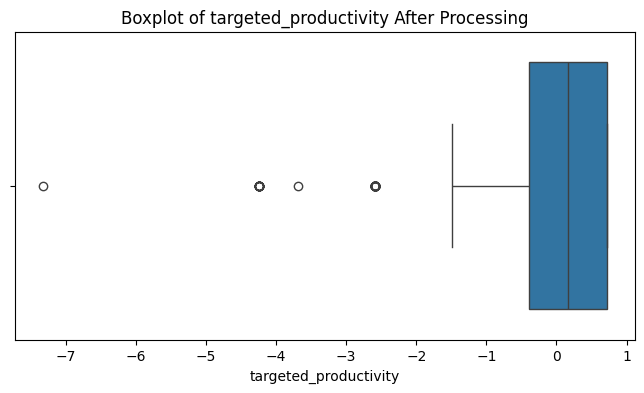

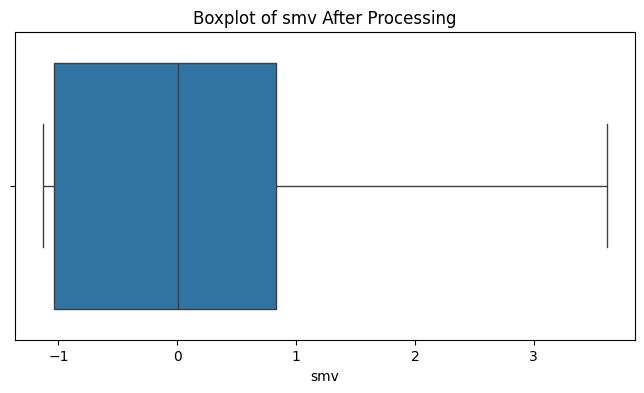

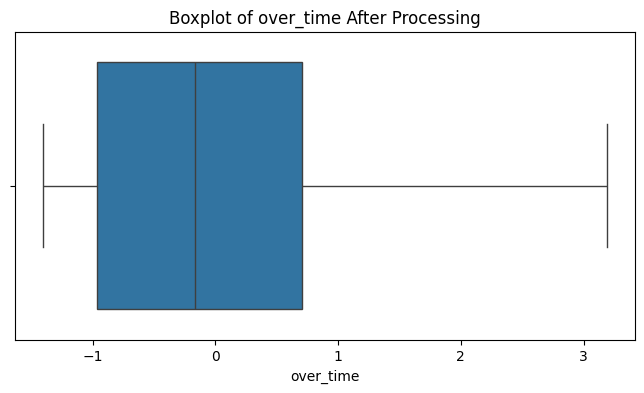

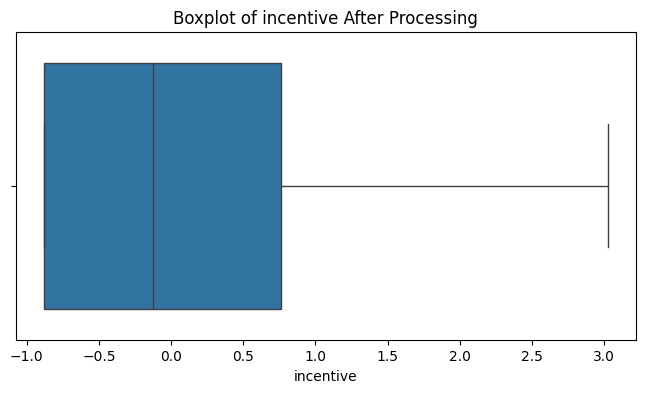

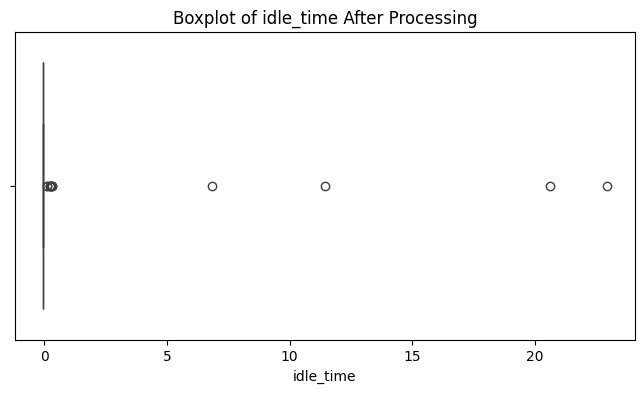

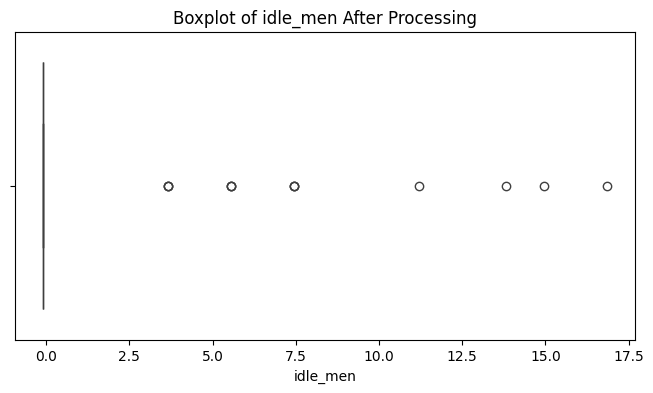

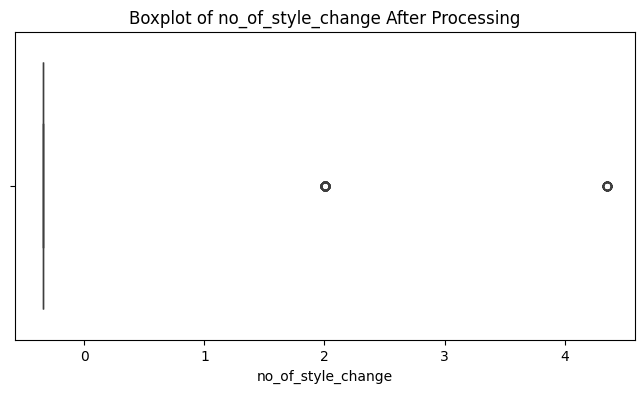

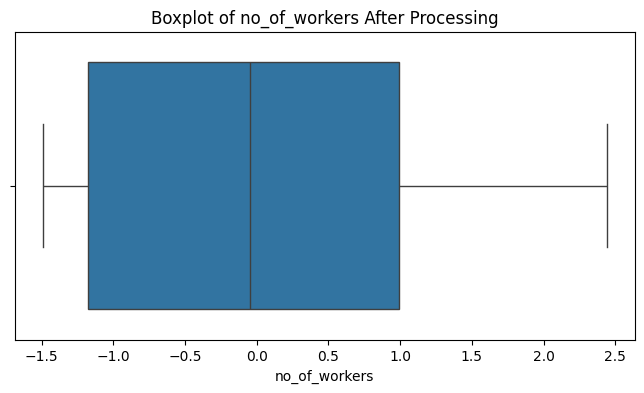

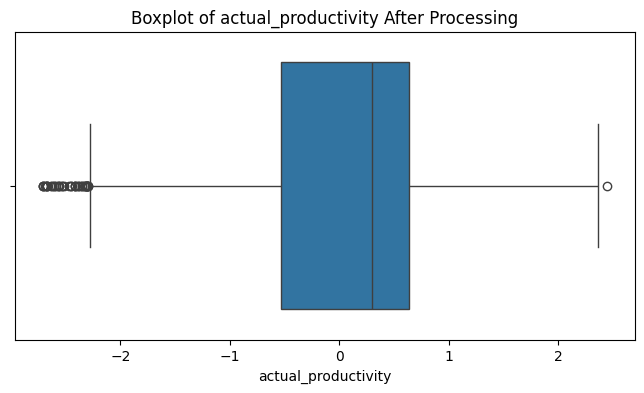

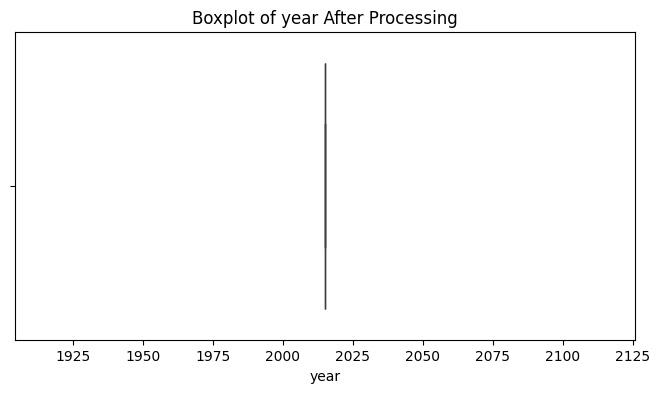

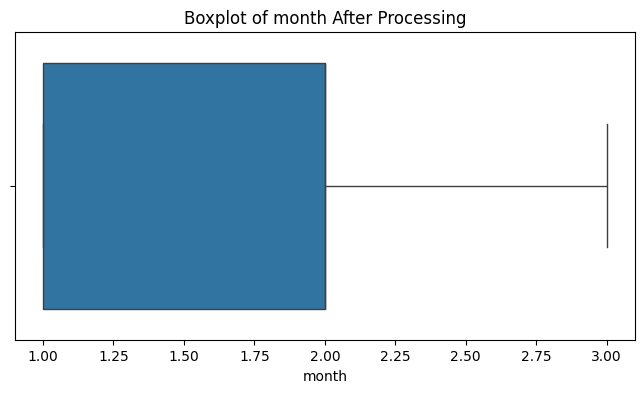

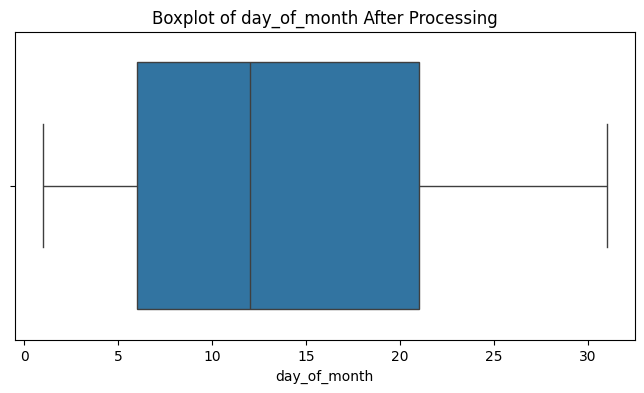

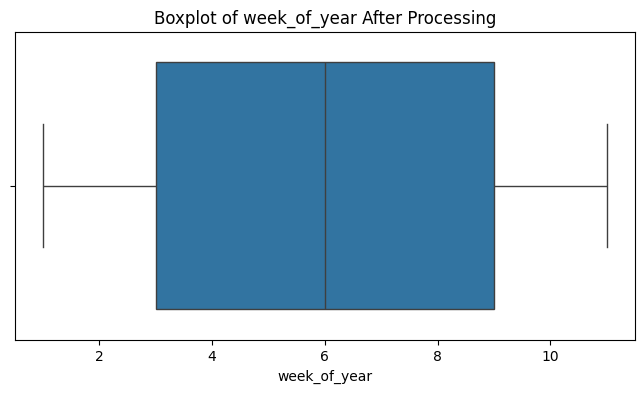

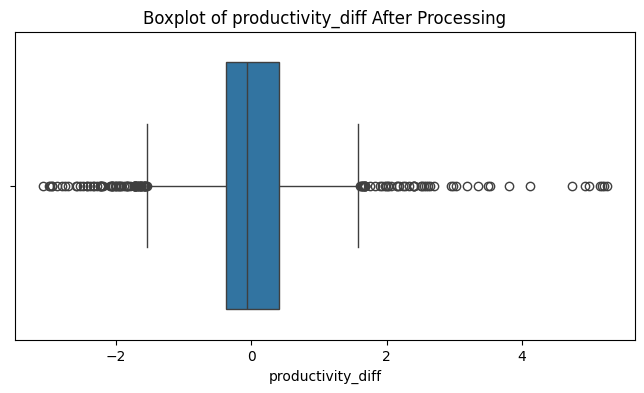

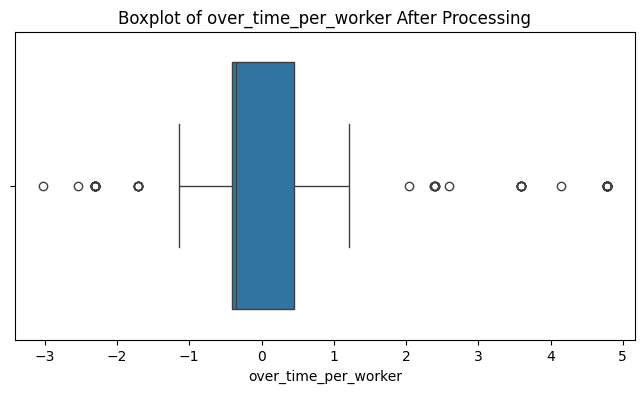

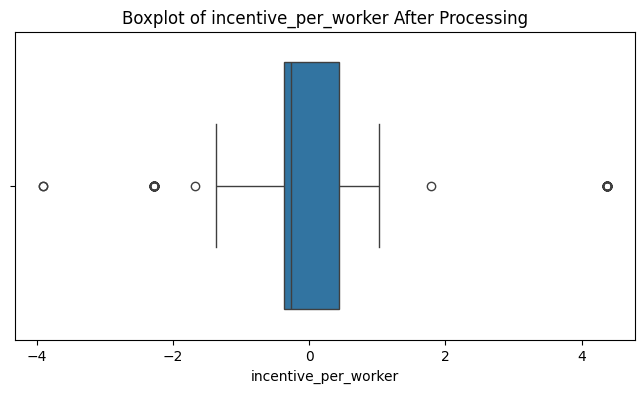

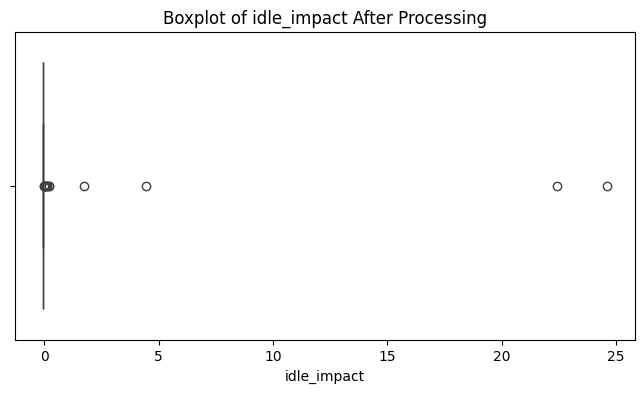

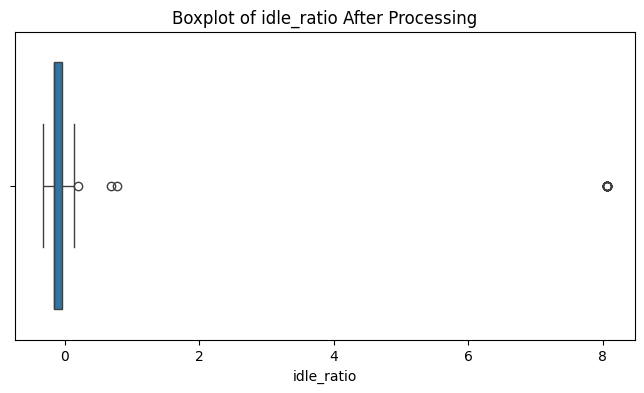

In [46]:
# Boxplots after processing
for col in all_numerical:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} After Processing')
    plt.show()

# **6. Correlation & Feature Selection**

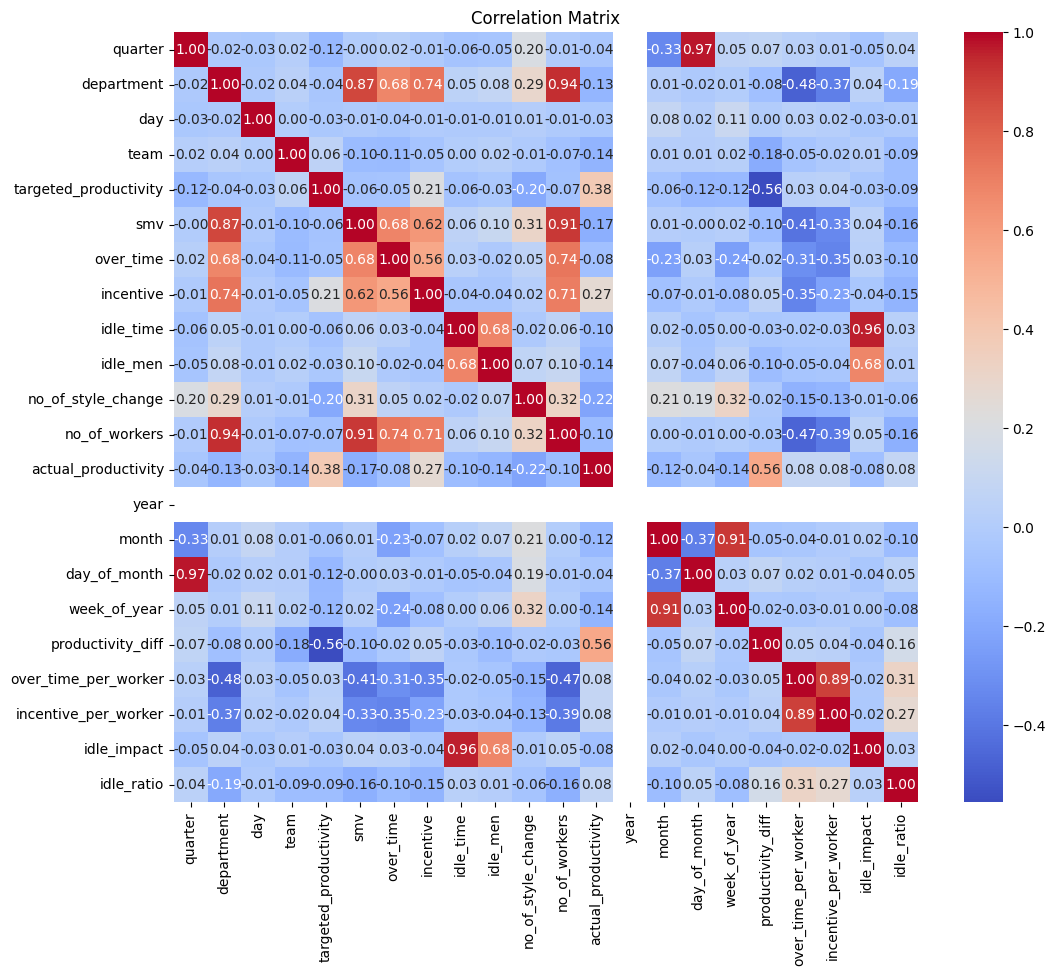

In [47]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Key insight:
- actual_productivity highest positive correlation: incentive, over_time, no_of_workers
- Strong negative: idle_time, idle_men, smv

In [48]:
# Focus on correlations with target 'actual_productivity'
if 'actual_productivity' in df.columns:
    corr_target = corr_matrix['actual_productivity'].sort_values(ascending=False)
    print("\nCorrelations with actual_productivity:")
    print(corr_target)


Correlations with actual_productivity:
actual_productivity      1.000000
productivity_diff        0.556112
targeted_productivity    0.381479
incentive                0.267302
over_time_per_worker     0.083938
incentive_per_worker     0.083640
idle_ratio               0.081238
day                     -0.028103
quarter                 -0.040322
day_of_month            -0.040577
idle_impact             -0.078462
over_time               -0.079926
idle_time               -0.098404
no_of_workers           -0.103048
month                   -0.117676
department              -0.133866
idle_men                -0.136255
week_of_year            -0.141620
team                    -0.144943
smv                     -0.167344
no_of_style_change      -0.218027
year                          NaN
Name: actual_productivity, dtype: float64
